In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

##  Loading Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



In [3]:
data.shape # We have 7752 rows and 25 columns

(7752, 25)

In [4]:
data.head() # Checking top 5 rows of our dataset

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


### Observations
#### We have missing values in number of columns
#### Label columns are too of numerical datatype hence this is a regression problem

In [6]:
data.dtypes # check datatype of all the coulumns

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [7]:
# Except date, all our columns are having numerical datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
# We have null values in some of our columns
data.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [9]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
cleaned_data = data.dropna(axis = 0, inplace = False) # Dropping rows where we have null values

In [11]:
#Changing date to datetime datatype and extracting year, month and day from it

cleaned_data['Date'] = pd.to_datetime(data['Date'])
cleaned_data['year']=cleaned_data['Date'].dt.year 
cleaned_data['month']=cleaned_data['Date'].dt.month 
cleaned_data['day']=cleaned_data['Date'].dt.day
cleaned_data = cleaned_data.drop(columns = "Date")# we don't need this column now

In [12]:
cleaned_data.info() # checking for nulls and datatype of coulumns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


In [13]:
cleaned_data.describe() #Checking statistical information of our cleaned data 

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,2014.991697,7.068134,16.337375
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,1.410877,2.242389,8.216880
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000


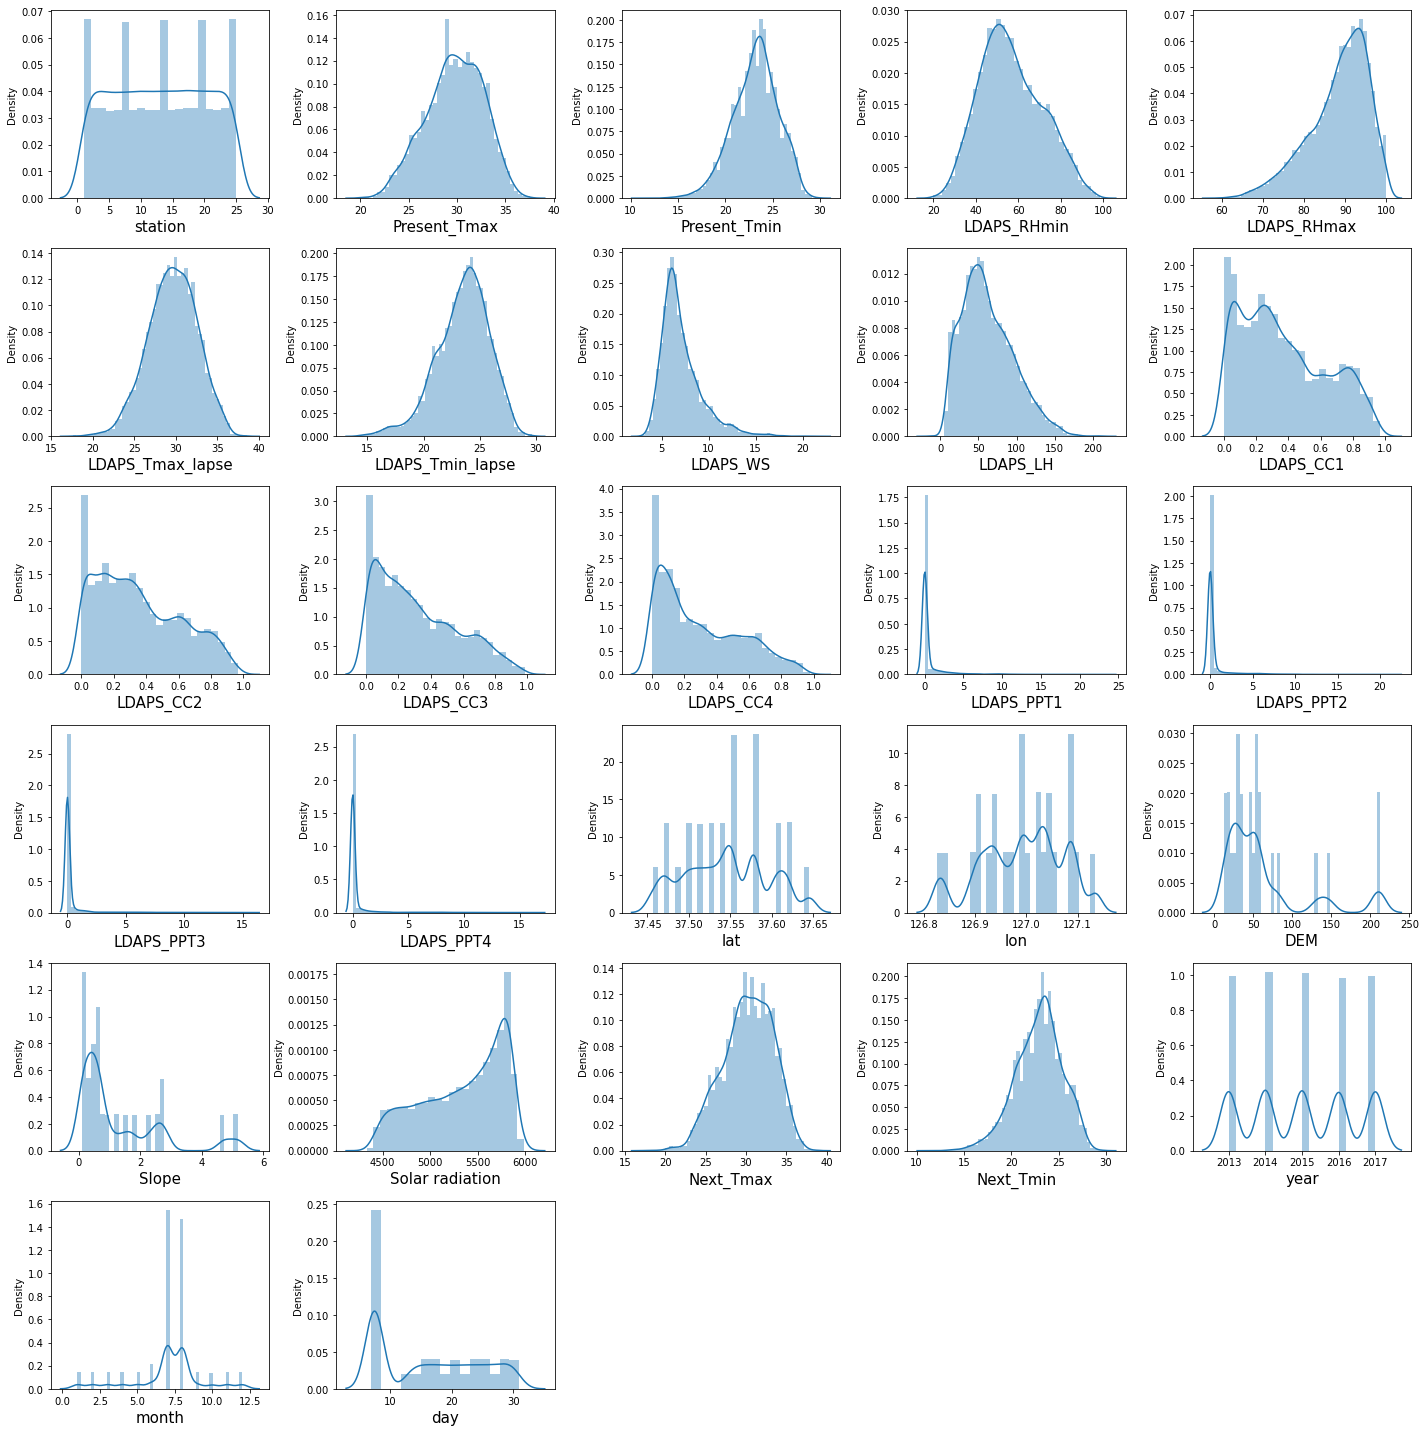

In [14]:
# Visualizing the distribution of our dataset
plt.figure(figsize =(20,20), facecolor = 'white')
plotnumber=1

for column in cleaned_data.columns:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.distplot(cleaned_data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

### Splitting our data

In [15]:
X = cleaned_data.drop(['Next_Tmax','Next_Tmin'],axis=1)

y_max = cleaned_data["Next_Tmax"] # target variable1
y_min = cleaned_data["Next_Tmin"] # target variable2

### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler # Scaling our feature data
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(X)

In [17]:
x_train, x_test, y_train, y_test  = train_test_split(x_scaler,y_max,test_size = 0.20, random_state=12) #For target variable1
X_train, X_test, Y_train, Y_test  = train_test_split(x_scaler,y_min,test_size = 0.20, random_state=12) #For target variable2

## Model building

### Linear regression Model

In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train) # for target variable 1

LinearRegression()

In [19]:
regression.score(x_train, y_train)

0.7860810009545337

In [20]:
y_pred1_LinearRegression = regression.predict(x_test) # Prediction

In [21]:
regression.score(x_test, y_test)

0.7746210942711758

In [22]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1_LinearRegression))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1_LinearRegression))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred1_LinearRegression)))

MAE: 1.1259199477649457
MSE: 2.223800878675291
RMSE: 1.0610937506954536


In [23]:
regression.fit(X_train, Y_train) # for target variable 2

LinearRegression()

In [24]:
regression.score(X_train, Y_train)

0.8390839025682598

In [25]:
y_pred2_LinearRegression = regression.predict(X_test) # Prediction

In [26]:
regression.score(X_test, Y_test)

0.8266957290448911

In [27]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred2_LinearRegression))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred2_LinearRegression))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(Y_test, y_pred2_LinearRegression)))

MAE: 0.7951552982469524
MSE: 1.0477918210782373
RMSE: 0.8917148076862649


### Support vector regression model

In [28]:
from sklearn.svm import SVR
sv_regressor = SVR(kernel = 'rbf')
sv_regressor.fit(x_train, y_train) # for target variable 1

SVR()

In [29]:
sv_regressor.score(x_train, y_train)

0.8613958256174172

In [30]:
y_pred1_SVRegression = sv_regressor.predict(x_test) # Prediction

In [31]:
sv_regressor.score(x_test, y_test)

0.8454457747333906

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1_SVRegression))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1_SVRegression))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred1_SVRegression)))

MAE: 0.886473092189975
MSE: 1.524977773937735
RMSE: 0.9415270002448018


In [33]:
sv_regressor.fit(X_train, Y_train) # for target variable 2

SVR()

In [34]:
sv_regressor.score(X_train, Y_train)

0.9036295062968843

In [35]:
y_pred2_SVRegression = sv_regressor.predict(X_test) # Prediction

In [36]:
sv_regressor.score(X_test, Y_test)

0.8870089635346786

In [37]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred2_SVRegression))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred2_SVRegression))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(Y_test, y_pred2_SVRegression)))

MAE: 0.6157762590891533
MSE: 0.6831400242535479
RMSE: 0.7847141257102189


### Decision Tree regressor model

In [38]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()
dt.fit(x_train, y_train) # Training the model for target variable 1

DecisionTreeRegressor()

In [39]:
dt.score(x_train, y_train) # scores for training

1.0

In [40]:
y_pred1_DTRegression = dt.predict(x_test) # Prediction

In [41]:
dt.score(x_test, y_test)

0.8015752401910041

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1_DTRegression))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1_DTRegression))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred1_DTRegression)))

MAE: 1.012977602108037
MSE: 1.9578458498023714
RMSE: 1.0064678842904213


In [43]:
dt.fit(X_train, Y_train) # for target variable 2

DecisionTreeRegressor()

In [44]:
dt.score(X_train, Y_train)

1.0

In [45]:
y_pred2_DTRegression = dt.predict(X_test) # Prediction

In [46]:
dt.score(X_test, Y_test)

0.7918406645687917

In [47]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred2_DTRegression))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred2_DTRegression))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(Y_test, y_pred2_DTRegression)))

MAE: 0.8189723320158103
MSE: 1.2585243741765482
RMSE: 0.9049709011983813


### Random forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train) # for target variable 1

RandomForestRegressor()

In [49]:
rf.score(x_train, y_train)

0.9874602519420829

In [50]:
y_pred1_RFRegression = rf.predict(x_test) # Prediction

In [51]:
rf.score(x_test, y_test)

0.9137494455815276

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1_RFRegression))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1_RFRegression))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred1_RFRegression)))

MAE: 0.7009038208168639
MSE: 0.851029328063241
RMSE: 0.8371999885432775


In [53]:
rf.fit(X_train, Y_train) # for target variable 2

RandomForestRegressor()

In [54]:
rf.score(X_train, Y_train)

0.9872254055596837

In [55]:
y_pred2_RFRegression = rf.predict(X_test) # Prediction

In [56]:
rf.score(X_test, Y_test)

0.9034716119229449

In [57]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred2_RFRegression))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred2_RFRegression))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(Y_test, y_pred2_RFRegression)))

MAE: 0.5745032938076416
MSE: 0.5836074031620554
RMSE: 0.7579599552797243


## Let's save our model

In [58]:
import pickle
filename = "Temperature_prediction"
pickle.dump(rf, open(filename,'wb'))